## Prueba #0503

### "Aumento de datos"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique las funciones de ayuda.
- Optimice y pruebe un modelo predictivo de su elección.
- Realice aumentos de datos para mejorar la precisión predictiva cuando los datos de entrenamiento proporcionados son pequeños.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias
%matplotlib inline

#### Leer los datos:
La explicación de los datos originales se puede encontrar [aquí](http://yann.lecun.com/exdb/mnist/).
- Los datos que usaremos son un pequeño subconjunto de los datos originales con solo 100 observaciones.
- Cada observación es la versión "aplanada" de una imagen.
- La primera columna corresponde a la etiqueta (Y).
- El tamaño de la imagen es 28x28.

In [2]:
# Lea los datos de entrenamiento y prueba por separado.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Escale y divida el conjunto de datos en X e Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])


1). Codifique la función auxiliar 'show_data ()' que visualiza cada observación dada. SUGERENCIA: use matplotlib.pyplot.imshow () y scipy.ndimage.interpolation ().

In [3]:
def show_data(X, Y, n, angle=0):
    # mostrar salida
    print(Y[n])
    d = np.sqrt(X[n,:].size)
    # Cambio de matriz 1D a 2D
    matriz_2d = X[n,:].reshape((int(d),int(d)))                                 
    # Rotar    
    matriz_2d_rot = rotate(matriz_2d, angle, cval=0.01, reshape=False)  
    plt.imshow(matriz_2d_rot, cmap='Greys',interpolation='None')
    plt.show()

3


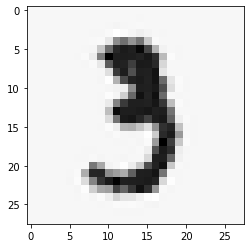

In [4]:
# Ejemplo 1.
show_data(X_train, Y_train,10,+10)

3


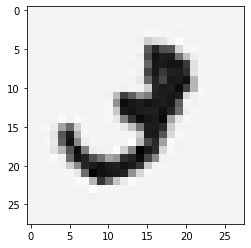

In [5]:
# Ejemplo 2.
show_data(X_train, Y_train,10,-30)

1


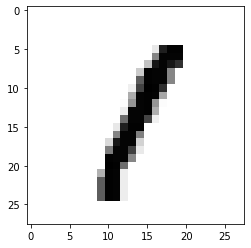

In [6]:
# Ejemplo 3.
show_data(X_train, Y_train,77,0)

2). Elija un algoritmo y realice el análisis predictivo.
- Optimizar los hiperparámetros.
- Calcule la precisión.
- ¿Es la precisión lo suficientemente alta?

In [7]:
# Optimización de hiper parámetros y validación del modelo con la mejor combinación de los mismos

# Parámetros para el clasificador RandomForestClassifier
# n_estimators --> nº estimadores
# max_depth --> profundidad máxima
nestim = np.arange(1,21,1)
maxd = np.arange(1,4,1)
parameters_rfc = {'n_estimators':nestim,'max_depth': maxd}

# RandomForestClassifier --> Clasificador de Random Forest
clf_rfc = RandomForestClassifier(random_state=43)

# Búsqueda exhaustiva de valores de parámetros especificados para un estimador con GridSearchCV  # , scoring = 'precision'
grid_search_rfc = GridSearchCV(clf_rfc, parameters_rfc, cv=10, n_jobs=-1)

# ajustar con los datos de entrenamiento del data set
grid_search_rfc.fit(X_train, Y_train)

# Obtener valor óptimo de los parámetros obtenidos
dic_mejor_par_rfc = grid_search_rfc.best_params_
mejor_ne= dic_mejor_par_rfc['n_estimators']
print('Valor óptimo obtenido para n_estimators: ', mejor_ne)
mejor_md = dic_mejor_par_rfc['max_depth']
print('Valor óptimo obtenido para max_depth: ', mejor_md)

# Predicción RandomForestClassifier
clas_rfc_mej_par = RandomForestClassifier(n_estimators=mejor_ne,max_depth=mejor_md, random_state=43)
# ajustar con datos entrenamiento
clas_rfc_mej_par.fit(X_train, Y_train)
# predicción
y_pred_rfc = clas_rfc_mej_par.predict(X_test)
print( "Precisión con la predicción RandomForestClassifier: " + str(metrics.precision_score(Y_test,y_pred_rfc, average='micro')))

Valor óptimo obtenido para n_estimators:  18
Valor óptimo obtenido para max_depth:  3
Precisión con la predicción RandomForestClassifier: 0.64


La precisión (nº de 1s correctamente predichos/ nº total de 1s predichos) no es muy alta. 
Como se puede comprobar en el informe de métricas para algunos
números la precisión obtenida es muy baja (en algún caso es 0) y ésto provoca
que la precisión media se vea afectada.

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.59      0.93      0.72        14
           2       1.00      0.12      0.22         8
           3       0.52      1.00      0.69        11
           4       0.62      0.71      0.67        14
           5       0.00      0.00      0.00         7
           6       0.67      0.60      0.63        10
           7       0.77      0.67      0.71        15
           8       0.50      0.50      0.50         2
           9       0.67      0.36      0.47        11

    accuracy                           0.64       100
   macro avg       0.61      0.59      0.55       100
weighted avg       0.64      0.64      0.59       100



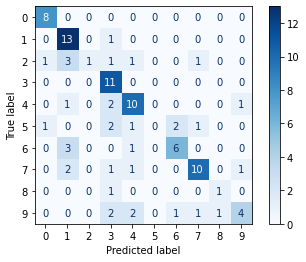

In [8]:
from sklearn.metrics import classification_report
# informe con las principales métricas de clasificación.
print(classification_report(Y_test,y_pred_rfc))

# Matriz de confusión
metrics.plot_confusion_matrix(clas_rfc_mej_par, X_test, Y_test , cmap=plt.cm.Blues)

3). Codifique la función auxiliar 'rotate_data ()' que rota cada observación dada en un ángulo. SUGERENCIA: use scipy.ndimage.interpolation ().

3


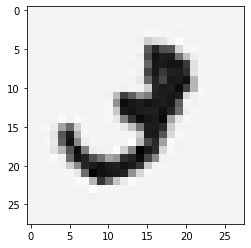

3


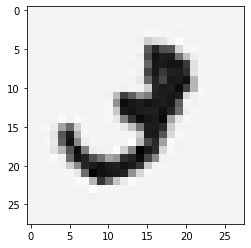

In [9]:
def rotate_data(X, observ, ang=0):
    d = np.sqrt(X[observ,:].size)
    # Cambio de matriz 1D a 2D
    matriz_2d = X[observ,:].reshape((int(d),int(d)))
    # Rotar    
    matriz_2d_rot = rotate(matriz_2d, ang, cval=0.01, reshape=False)  
    # Cambio de matriz 2D a 1D
    matriz_1d_rot = matriz_2d_rot.ravel()
    return matriz_1d_rot

# probar resultado rotación
obs = 10
y_obs = Y_train[obs]

# mostrar la imagen de la observación con rotación -30 del dataset original
show_data(X_train, Y_train, obs, -30)

# obtener observación rotada
X_obs_rot = rotate_data(X_train, obs, -30)

# generar nuevo dataset para comprobar que la rotación obtenida previamente es correcta
Y_prueba_rot = np.array([y_obs])
X_prueba_rot = np.array([[X_obs_rot]])
# mostrar la observación del dataset de prueba sin rotación (debe aparecer rotada
# ya que el dataset de prueba la contiene con rotación con respecto a la original)
show_data(X_prueba_rot, Y_prueba_rot, 0, 0)


4). Aumente el conjunto de datos de entrenamiento.
- Aumente el tamaño del conjunto de datos de entrenamiento al introducir ligeras rotaciones (en sentido horario y antihorario).
- Utilice la función 'rotate_data ()' definida en el paso anterior.
- No es necesario aumentar el conjunto de datos de prueba.
- Objetivo aproximadamente cinco veces mayor.

In [10]:
tipos_sal, rep_tip_sal = np.unique(Y_train, return_counts = True)
print('Tipos de salidas: ',tipos_sal)
print('Nº de ocurrencias por salida: ', rep_tip_sal)
n_obs, n_carac = X_train.shape
print('Número observaciones del dataset original: ' ,n_obs)    
nuevas_obs_sal = 100   
num_rot_sal = np.array([])
for i in np.arange(0, rep_tip_sal.size):
    obs_gen = np.round(nuevas_obs_sal/rep_tip_sal[i])
    if obs_gen % 2 == 0:
        num_rot_sal = np.append(num_rot_sal, obs_gen/2)
    else:
        num_rot_sal = np.append(num_rot_sal, (obs_gen +1) /2 )    

def genera_num_rot(num_rot):
    ang_max= 3
    ang_ini = ang_max/num_rot
    rotaciones = np.array([])
    for i in np.arange(0, num_rot):
        rotaciones = np.append(rotaciones, ang_ini + ang_ini*i)  
    return rotaciones

obs_rotadas = np.array([])
sal_obs_rotadas = np.array([])
ind_obs = np.arange(0, n_obs)
for i_obs in ind_obs:
    obs = X_train[i_obs]
    sal_obs = Y_train[i_obs]
    num_rot = num_rot_sal[sal_obs]
    rotaciones = genera_num_rot(num_rot)
    for rot in rotaciones:
        obs_rot_sh = rotate_data(X_train, i_obs, -rot)
        obs_rot_sah = rotate_data(X_train, i_obs, rot)
        obs_rotadas = np.append(obs_rotadas,[[obs_rot_sh]])
        obs_rotadas = np.append(obs_rotadas,[[obs_rot_sah]])  
        sal_obs_rotadas = np.append(sal_obs_rotadas, np.full(2, Y_train[i_obs]))

# Incluir observaciones y salida esperada en el dataset original
X_train_ca = np.append(X_train, obs_rotadas)
X_train_ca = X_train_ca.reshape(-1, n_carac)
n_obs_ca, n_carac_ca = X_train_ca.shape
print('Número observaciones del dataset tras haberse aumentado: ' ,n_obs_ca)
#Y_train = np.append(Y_train, sal_obs_rotadas  x.astype(int))
Y_train_ca = np.append(Y_train, sal_obs_rotadas.astype(int))
# comprobar cómo se ha aumentado la frecuencia para cada tipo de salida
tipos_sal_ca, rep_tip_sal_ca = np.unique(Y_train_ca, return_counts = True)
print('Nº de ocurrencias por salida del dataset tras haberse aumentado:', rep_tip_sal_ca)

Tipos de salidas:  [0 1 2 3 4 5 6 7 8 9]
Nº de ocurrencias por salida:  [13 14  6 11 11  5 11 10  8 11]
Número observaciones del dataset original:  100
Número observaciones del dataset tras haberse aumentado:  1160
Nº de ocurrencias por salida del dataset tras haberse aumentado: [117 126 114 121 121 105 121 110 104 121]


5). Rehaga el análisis predictivo con el conjunto de datos de entrenamiento aumentado.
- Utilice el mismo algoritmo que en el paso 2).
- Calcule la precisión.
- ¿Ha aumentado la precisión?

In [11]:
# Optimización de hiper parámetros y validación del modelo con la mejor combinación de los mismos

# Parámetros para el clasificador RandomForestClassifier del conjunto aumentado
# n_estimators --> nº estimadores
# max_depth --> profundidad máxima
nestim_ca = np.arange(1,21,1)
maxd_ca = np.arange(1,4,1)
parameters_rfc_ca = {'n_estimators':nestim_ca,'max_depth': maxd_ca}

# RandomForestClassifier --> Clasificador de Random Forest
clf_rfc_ca = RandomForestClassifier(random_state=43)
# Búsqueda exhaustiva de valores de parámetros especificados para un estimador con GridSearchCV  # , scoring = 'precision'
grid_search_rfc_ca = GridSearchCV(clf_rfc_ca, parameters_rfc_ca, cv=10, n_jobs=-1)

# ajustar con los datos de entrenamiento del data set
grid_search_rfc_ca.fit(X_train_ca, Y_train_ca)

# Obtener valor óptimo de los parámetros obtenidos
dic_mejor_par_rfc_ca = grid_search_rfc_ca.best_params_
mejor_ne_ca= dic_mejor_par_rfc_ca['n_estimators']
print('Valor óptimo obtenido para n_estimators: ', mejor_ne_ca)
mejor_md_ca = dic_mejor_par_rfc_ca['max_depth']
print('Valor óptimo obtenido para max_depth: ', mejor_md_ca)

# Predicción RandomForestClassifier
clas_rfc_mej_par_ca = RandomForestClassifier(n_estimators=mejor_ne_ca,max_depth=mejor_md_ca, random_state=43)
# ajustar con datos entrenamiento
clas_rfc_mej_par_ca.fit(X_train_ca, Y_train_ca)
# predicción
y_pred_rfc_ca = clas_rfc_mej_par_ca.predict(X_test)
print( "Precisión con la predicción RandomForestClassifier: " + str(metrics.precision_score(Y_test,y_pred_rfc_ca, average='micro')))

Valor óptimo obtenido para n_estimators:  19
Valor óptimo obtenido para max_depth:  3
Precisión con la predicción RandomForestClassifier: 0.67


La precición (nº de 1s correctamente predichos / nº total de 1s predichos) para el  el conjunto de datos de entrenamiento aumentado ha aumentado con respecto al resultado anterior.

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.72      0.93      0.81        14
           2       0.60      0.38      0.46         8
           3       0.69      0.82      0.75        11
           4       0.58      0.79      0.67        14
           5       0.00      0.00      0.00         7
           6       0.75      0.60      0.67        10
           7       0.80      0.80      0.80        15
           8       0.50      0.50      0.50         2
           9       0.40      0.36      0.38        11

    accuracy                           0.67       100
   macro avg       0.58      0.62      0.59       100
weighted avg       0.62      0.67      0.64       100



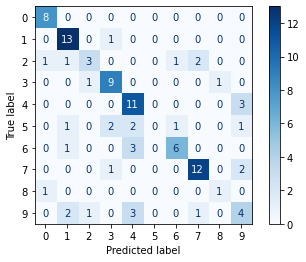

In [12]:
from sklearn.metrics import classification_report
# informe con las principales métricas de clasificación.
print(classification_report(Y_test,y_pred_rfc_ca))

# Matriz de confusión
metrics.plot_confusion_matrix(clas_rfc_mej_par_ca, X_test, Y_test , cmap=plt.cm.Blues)